# Tree

The `kissim.comparison.tree` module allows to a `kissim`-based kinase distance matrix into a clustered `kissim`-based kinome tree with mean distances assigned to each branch. Different clustering methods are enabled.

This tree can be saved in the Newick format alongsite an annotation file mapping kinase names to their kinase groups and families. These files can be loaded into e.g. FigTree to visualize the `kissim`-based kinome tree.

## Generate tree

- Input file: `kissim_matrix.csv`
- Output file (optionally): `kissim.tree` and `kinase_annotations.csv`
- Clustering method: `ward` (default), `complete`, `weighted`, `average`, `centroid`

In [1]:
from pathlib import Path

In [2]:
# Load path to test data
from kissim.dataset.test import PATH as PATH_TEST_DATA

### Python API

```python
from kissim.comparison import tree
tree.from_file(kinase_matrix_path, tree_path, annotation_path, clustering_method)
```

In [3]:
from kissim.comparison import tree

In [4]:
tree.from_file(
    PATH_TEST_DATA / "kinase_matrix.csv", "kissim.tree", "kinase_annotation.csv", "ward"
);

### CLI

```bash
kissim tree -i kinase_matrix.csv -o kissim.tree -a kinase_annotation.csv -c ward
```

In [5]:
# flake8-noqa-cell-E501-E225
PATH_KINASE_MATRIX = "../../kissim/tests/data/kinase_matrix.csv"
!kissim tree -i $PATH_KINASE_MATRIX -o kissim.tree -a kinase_annotation.csv -c ward

INFO:kissim.comparison.tree:Reading kinase matrix from ../../kissim/tests/data/kinase_matrix.csv
INFO:kissim.comparison.tree:Clustering (method: ward) and calculating branch distances
INFO:kissim.comparison.tree:Converting clustering to a Newick tree
INFO:kissim.comparison.tree:Writing resulting tree to kissim.tree
INFO:kissim.comparison.tree:Writing resulting kinase annotation to kinase_annotation.csv


## Visualize tree

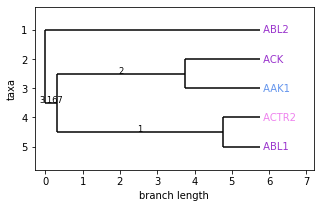

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from Bio import Phylo

groups_to_color = {
    "AGC": "red",
    "Atypical": "orange",
    "CAMK": "yellowgreen",
    "CK1": "limegreen",
    "CMGC": "turquoise",
    "Other": "cornflowerblue",
    "STE": "mediumblue",
    "TK": "darkorchid",
    "TKL": "violet"
}

kinases_to_groups = pd.read_csv(Path("kinase_annotation.csv"), sep="\t")
kinases_to_groups["color"] = kinases_to_groups.apply(
    lambda x: groups_to_color[x["kinase.group"]], axis=1
)
label_colors = kinases_to_groups.set_index("kinase.klifs_name")["color"].to_dict()

kissim_tree = Phylo.read(Path("kissim.tree"), "newick")
# Flip branches so deeper clades are displayed at top
kissim_tree.ladderize()

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
Phylo.draw(kissim_tree, axes=ax, label_colors=label_colors)

In [7]:
# Clean up
Path("kissim.tree").unlink()
Path("kinase_annotation.csv").unlink()

### FigTree

#### Resources

This is a list of resources that are useful to get started with FigTree.

- Website: http://tree.bio.ed.ac.uk/software/figtree/
- GitHub: https://github.com/rambaut/figtree
- Download: https://github.com/rambaut/figtree/releases
- Tutorial videos:
  - https://www.coursera.org/lecture/informatics/viewing-the-tree-in-figtree-QqGis
  - https://www.youtube.com/watch?v=9jLvi5eksAw
- Help with tip label coloring using annotations:
  - https://groups.google.com/g/figtree-discuss/c/UR2rTvtIzcw
  - https://github.com/rambaut/figtree/issues/53

#### Download and usage under Linux

- Download and unpack [tgz file](https://github.com/rambaut/figtree/releases/download/v1.4.4/FigTree_v1.4.4.tgz)
- Read `FigTree_<your-version>/README.txt` > 3) INSTALLATION
- Go to `FigTree_<your-version>/lib` and start FigTree with `java -Xms64m -Xmx512m -jar figtree.jar "$@"`

#### Step-by-step guide to visualize `kissim` trees

- File > Open > `kissim.tree` > Name label: "Mean similarity" or "Mean distance"
- Selection mode: "Node"
- Style the tree (left-side menu)
  - Layout
    - Polar tree layout (see middle button)
    - Optionally: Angle range
    - Optionally: Root angle
  - Appearance
    - Color by: "Mean similarity" or "Mean distance"
    - Setup > Colours > Scheme > Colour Gradient (TODO: define colors)
    - Setup > Tick "Gradient"
    - Line weight: "2"
- Tip Labels (tick!)
- Legend (tick!)
- Optionally: Node Labels (tick!)

We can color the tip labels (kinase names) by their kinase groups in order to easily compare the structure-based clustering/tree (`kissim`) with the sequence-based clustering/tree (Manning).

- Save kinase names and kinase groups (and other attributes) in a tab-separated CSV file `kinase_annotations.csv`. In the following example below, the `kinase.klifs_name` names must match with the tip labels.

  ```
  kinase.klifs_name	kinase.group	kinase.family
  AAK1  Other	NAK
  ABL1	TK	Abl
  ABL2	TK	Abl
  ACK	TK	Ack
  ```
- File > Import Annotations > `kinase_annotations.csv`
- Tip Labels (ticked) > Colour by > "kinase.group"
- That's it :)